# Visualização de Dados

## Titanic

In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic/train.csv')


In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'ImaosCOnjuge',
       'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']


In [10]:
data['Sexo'] = data['Sexo'].map({'male': 'homem', 'female': 'mulher'})



In [11]:
data

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,ImaosCOnjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",homem,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",mulher,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",mulher,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",homem,26.0,0,0,111369,30.0000,C148,C


In [12]:
data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabine, Length: 891, dtype: object

In [13]:
data['Cabine'] = data['Cabine'].apply(lambda x: x[0] if pd.notna(x) else np.nan)

# Matplotlib

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
data['Idade'].isnull().sum()

177

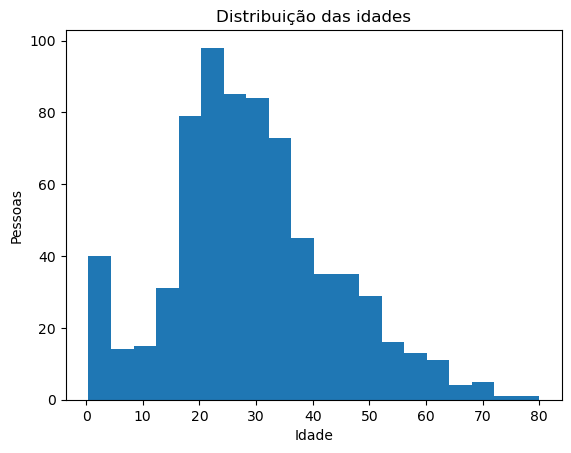

In [23]:
plt.hist(data['Idade'].dropna(), bins=20)
plt.title('Distribuição das idades')
plt.ylabel('Pessoas')
plt.xlabel('Idade')
plt.show()

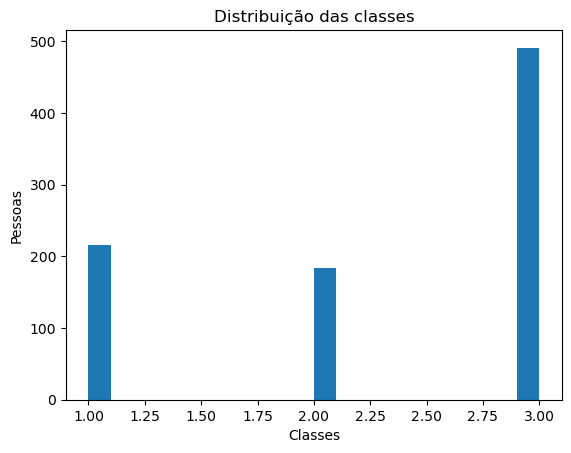

In [36]:
plt.hist(data['Classe'].dropna(), bins=20)
plt.title('Distribuição das classes')
plt.ylabel('Pessoas')
plt.xlabel('Classes')
plt.show()

## Subplots - 1ª Forma


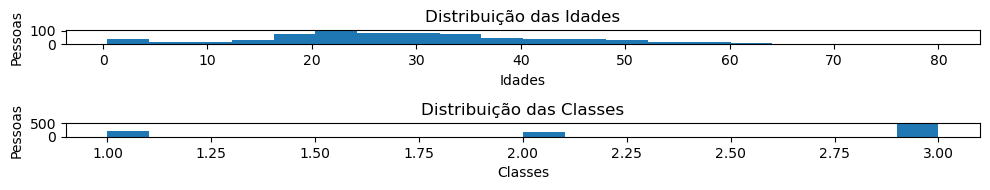

In [52]:
plt.figure(figsize=(10,2))
plt.subplot(2,1,1) # linha, coluna plot 1
plt.hist(data['Idade'].dropna(), bins=20)
plt.title('Distribuição das Idades')
plt.ylabel('Pessoas')
plt.xlabel('Idades')

plt.subplot(2,1,2) # linha, coluna plot 1
plt.hist(data['Classe'].dropna(), bins=20)
plt.title('Distribuição das Classes')
plt.ylabel('Pessoas')
plt.xlabel('Classes')

plt.tight_layout()
plt.show()

## Subplots - 2ª Forma

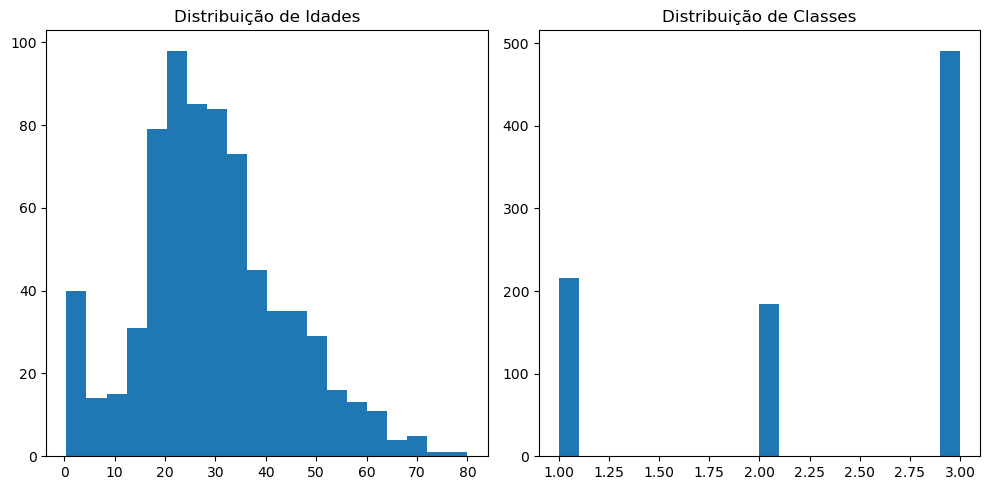

In [57]:
f, ax = plt.subplots(1,2, figsize=(10,5), dpi=100) # 1 linha, 2 colunas
ax[0].hist(data['Idade'].dropna(), bins=20)
ax[0].set_title('Distribuição de Idades')


ax[1].hist(data['Classe'].dropna(), bins=20)
ax[1].set_title('Distribuição de Classes')

plt.tight_layout()
plt.show()

## Seaborn

In [58]:
import seaborn as sns

In [59]:
data['Sobreviveu'].value_counts()

0    549
1    342
Name: Sobreviveu, dtype: int64

In [60]:
data['Sexo'].value_counts()

homem     577
mulher    314
Name: Sexo, dtype: int64

In [61]:
data['Classe'].value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

## pie e countplot

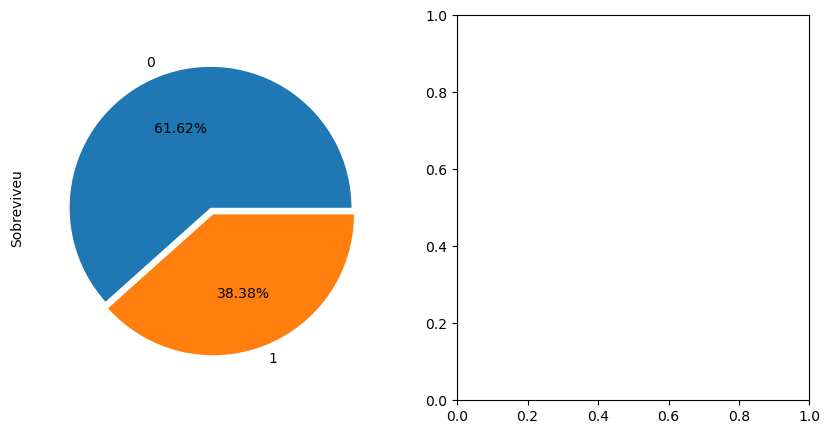

In [76]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Sobreviveu'].value_counts().plot.pie(ax=ax[0], explode=[0,0.05], autopct='%0.2f%%')

plt.show()

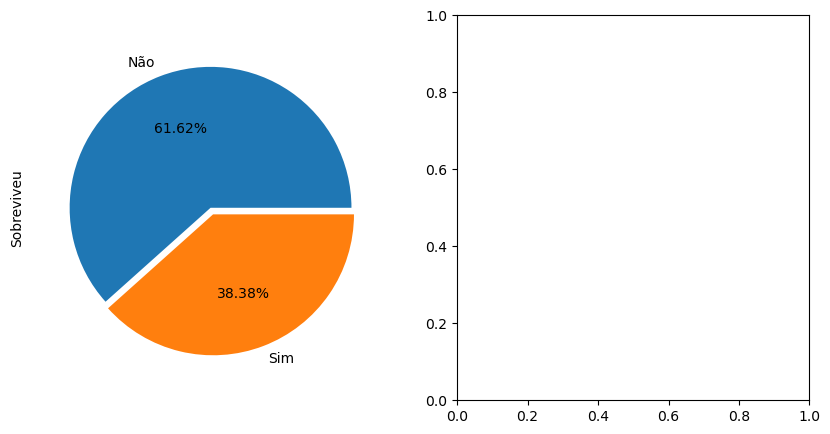

In [77]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Sobreviveu'].map({0: 'Não', 1: 'Sim'}).value_counts().plot.pie(ax=ax[0], explode=[0,0.05], autopct='%0.2f%%')

plt.show()

C:\Users\phill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '')

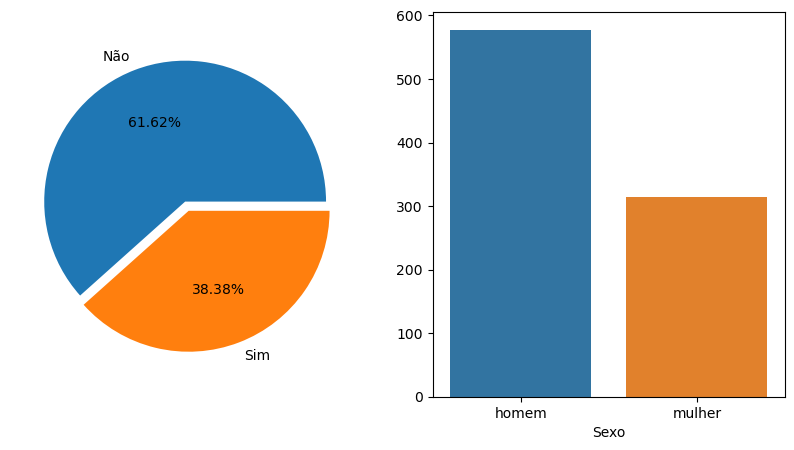

In [86]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Sobreviveu'].map({0: 'Não', 1: 'Sim'}).value_counts().plot.pie(ax=ax[0], explode=[0.02,0.05], autopct='%0.2f%%')
ax[0].set_ylabel('')

sns.countplot('Sexo', data=data, ax=ax[1])
ax[1].set_ylabel('')

## countplot e hue

C:\Users\phill\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sexo', ylabel='count'>

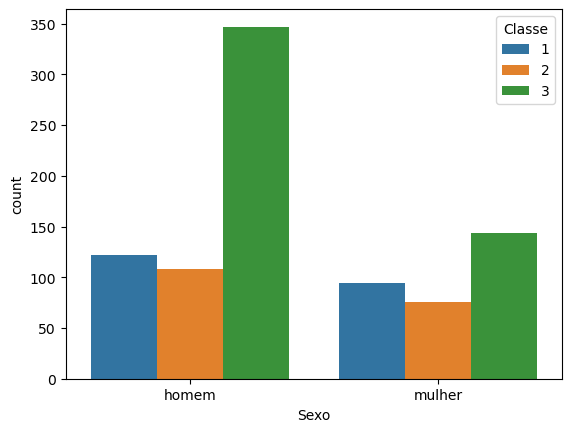

In [105]:
sns.countplot('Sexo', hue='Classe', data=data)


## boxplot

<AxesSubplot:xlabel='Classe', ylabel='Idade'>

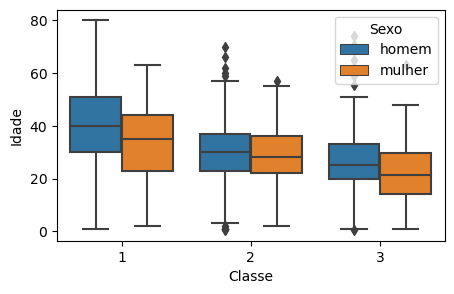

In [106]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)